In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cgu_emendas_parlamentares_tidy.csv")

df.head(3)

,ano_emenda,codigo_emenda,numero_emenda,tipo_emenda,nome_autor_emenda,localidade_gasto,id_municipio_gasto,sigla_uf_gasto,nome_funcao,nome_subfuncao,valor_empenhado,pago_integralmente
0,2015,201512550013,0013,Emenda Individual - Transferências,FATIMA BEZERRA,RIO GRANDE DO NORTE (UF),NaN,RN,Saúde,Múltiplo,848670.0,1
1,2015,201517990005,0005,Emenda Individual - Transferências,BETO MANSUR,SÃO PAULO (UF),NaN,SP,Saúde,Múltiplo,459020.0,1
2,2015,201519680007,0007,Emenda Individual - Transferências,GIACOBO,PARANÁ (UF),NaN,PR,Saúde,Múltiplo,1905120.1,0


Vamos começar coletando algumas informações básicas sobre nosso conjunto de dados. Para determinar o que podemos fazer com eles, precisamos saber quais informações temos disponíveis e seu formato.

# Informações básicas sobre o conjunto de dados

Para saber as colunas incluídas, e o tipo de variável vamos usar o método `info()`. Isso nos retornará além de uma listagem das colunas, o número de linhas preenchidas e o tipo de variável em cada uma delas.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66102 entries, 0 to 66101
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano_emenda          66102 non-null  int64  
 1   codigo_emenda       66102 non-null  object 
 2   numero_emenda       66102 non-null  object 
 3   tipo_emenda         66102 non-null  object 
 4   nome_autor_emenda   66102 non-null  object 
 5   localidade_gasto    66102 non-null  object 
 6   id_municipio_gasto  17241 non-null  float64
 7   sigla_uf_gasto      60327 non-null  object 
 8   nome_funcao         66102 non-null  object 
 9   nome_subfuncao      66102 non-null  object 
 10  valor_empenhado     66102 non-null  float64
 11  pago_integralmente  66102 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ MB


Temos um conjunto de informações interessante que nos permitem caminhos diferentes para explorar e analisar os dados. Podemos tomar um caminho mais geral, analisando informações sobre todo o conjunto de dados. Poderíamos também tomar uma abordagem mais específica, analisando informações sobre uma área de gastos (`nome_funcao`), ou uma Unidade Federativa específica.

Além disso, podemos analisar aspectos diferentes, como o Número de propostas, o valor total previsto ou apenas o valor das propostas pagas em sua integralidade.

A melhor ideia ao nos depararmos com um conjunto de dados desconhecido é entender o comportamento das colunas que desejamos utilizar. Por exemplo, podemos começar verificando a distribuição de variáveis categoricas usando um `countplot` ou a distribuição de variáveis numéricas usando um `histplot`.

Uma outra forma de visualizar contagem de valores é usando o método `value_counts()`. Ele nos retorna a contagem de valores únicos em uma coluna específica, semelhante ao que aconteceria se criássemos um countplot.

Vamos observar as diferentes funções governamentais que podem receber valores através de emendas parlamentares.

In [4]:
df["nome_funcao"].value_counts()

nome_funcao
Saúde                    27636
Educação                  6004
Urbanismo                 5866
Encargos especiais        3831
Agricultura               3181
Desporto e lazer          3169
Assistência social        2873
Defesa nacional           2457
Direitos da cidadania     2284
Segurança pública         1851
Cultura                   1846
Comércio e serviços       1670
Ciência e Tecnologia       647
Gestão ambiental           622
Organização agrária        604
Transporte                 383
Múltiplo                   346
Trabalho                   308
Comunicações               121
Indústria                  109
Saneamento                  82
Administração               78
Relações exteriores         62
Habitação                   44
Previdência social          20
Energia                      6
Essencial à justiça          2
Name: count, dtype: int64

Poderíamos também criar um `countplot` para visualizar a informação, mas como temos muitas categorias diferentes, a visualização pode não ficar muito boa. Se não vamos apresentar essa informação para outras pessoas, o método `value_counts()` é suficiente para nossa exploração inicial.

Vamos criar um gráfico para entender a coluna `pago_integralmente`:

<Axes: xlabel='pago_integralmente', ylabel='count'>

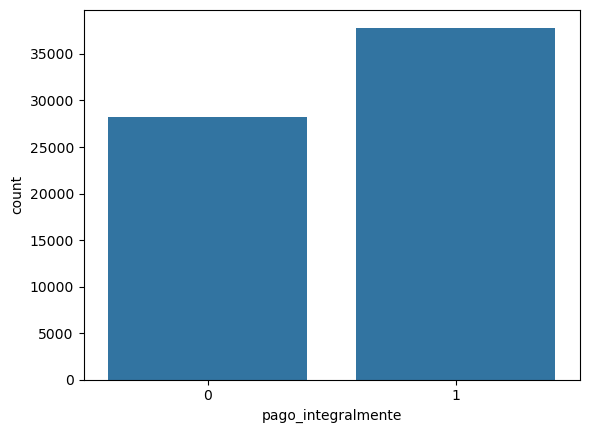

In [5]:
sns.countplot(
    x="pago_integralmente",
    data=df,
)

Essa é a primeira vez que nos deparramos com uma coluna desse tipo no curso. Costumamos chamar esse tipo de coluna com valor binários de variáveis *dummies*. Elas são muito comuns em análise de dados, e são usadas para representar variáveis categóricas que possuem apenas dois valores possíveis (podemos usar múltiplas colunas para representar variáveis categóricas com mais de dois valores possíveis, mas não abordaremos isso agora).

Geralmente a coluna vai indicar a presença (1) ou ausência (0) de uma característica. Nesse caso, a coluna `pago_integralmente` indica se a emenda foi paga integralmente pelo governo (1) ou não (0). Além de ser uma forma simples de representar informações, também traz muitas vantagens para modelar e explorar uma variável.

Vamos criar um gráfico para entender como podemos fazer uso desse tipo de informação presente na coluna `pago_integralmente`:

<Axes: xlabel='pago_integralmente', ylabel='tipo_emenda'>

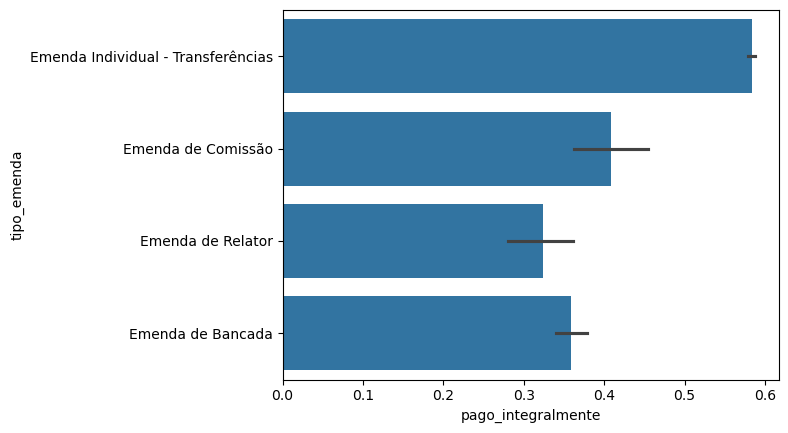

In [8]:
sns.barplot(
    y="tipo_emenda",
    x="pago_integralmente",
    data=df,
)

Antes de determinamos o significado exato desse gráfico, devemos nos lembrar que por padrão o seborn usa o argumento `estimator="mean"`. Ou seja, cada barra contém a média da coluna `pago_integralmente` para cada categoria de `tipo_emenda`. Mas o que isso significa?

Imagine que jogamos uma moeda para cima 5 vezes, anotando seu valor como 1 para resultados de cara e 0 de coroa. Armazenamos os valores de duas rodadas em listas e ao final temos o seguinte resultado:

```python
resultados_1 = [1, 0, 1, 1, 0]

resiçtados_2 = [1, 0, 0, 0, 0]
```

Se calcularmos a média desses valores, teremos: $(1 + 0 + 1 + 1 + 0) / 5 = 0.6$ para o primeiro experimento e $1 / 5 = 0.2$ para o segundo. Antes de continuar a leitura, tente responder o que cada um desses valores nos diz sobre o resultado total do experimento.